In [1]:
# Data manipulation and analysis imports

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Data visualisation imports

import matplotlib.pyplot as plt
import seaborn as sns

# White background for all seaborn plots
sns.set_style('whitegrid')

# See all plots in the iPython notebook
%matplotlib inline

In [3]:
# Import iris dataset from scikit learn

from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
# Load the features and target into variables

X = iris.data

Y = iris.target

In [6]:
# Check data description

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# Load features into a dataframe

iris_df = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [8]:
# Load target into a dataframe

iris_target = DataFrame(Y,columns=['Species'])

In [9]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [10]:
# The species are encoded into numbers where 0 is Setosa, 1 is Versicolor and 2 is Virginica. We have to change back to names

def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'

iris_target['Species'] = iris_target['Species'].apply(flower)

iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [11]:
 iris = pd.concat([iris_df,iris_target],axis=1)

In [12]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


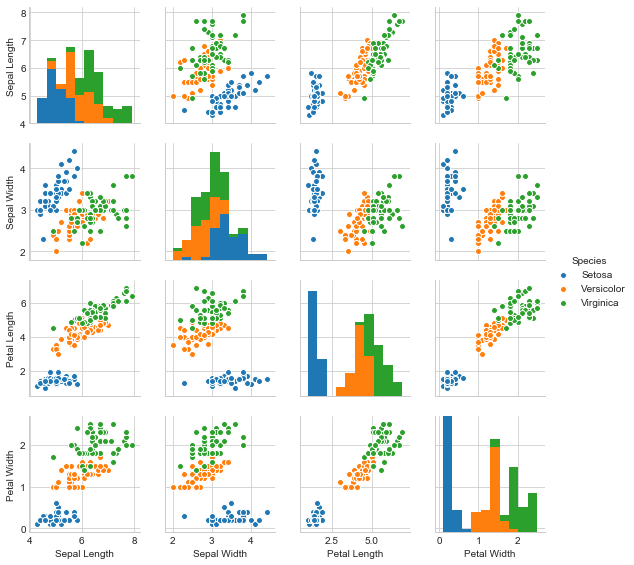

In [13]:
# Quick visualisation of the dataset

sns.pairplot(iris,hue='Species',size=2)

In [14]:
# We can see that Setosa is clearly distinct from the other 2 species. The challenge would be to classify between virginica 
# and versicolor

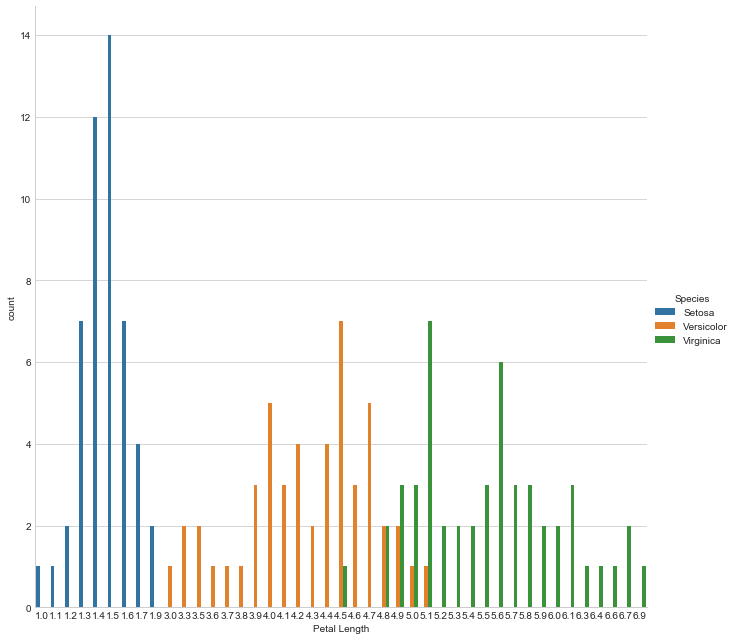

In [15]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',size=9)

In [16]:
# Again, we see that there are no overlaps with Setosa, it is pretty distinct

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
logreg = LogisticRegression()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

In [19]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
pred = logreg.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
print(metrics.accuracy_score(Y_test,pred))

0.933333333333


In [23]:
# We got an initial accuracy of 93.33% which is expected because we saw in the pairplot how separated the targets are based on 
# features

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=6)

In [26]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [27]:
predictions = knn.predict(X_test)

In [28]:
print(metrics.accuracy_score(Y_test,predictions))

0.95


In [29]:
# Using k=6, we have 95% accuracy

In [30]:
knn1 = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn1.fit(X_train,Y_train)
predictions = knn1.predict(X_test)

In [32]:
print(metrics.accuracy_score(Y_test,predictions))

0.966666666667


In [33]:
# With k=1 we got a higher accuracy of 96.6%

In [34]:
# We can see what accuracy we get with different k values from 1 to 20

accuracy = []

for k in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

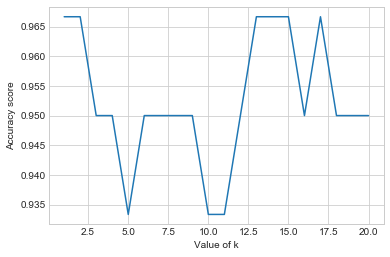

In [35]:
k_range = range(1,21)
plt.plot(k_range,accuracy)
plt.xlabel('Value of k')
plt.ylabel('Accuracy score')